In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
dates = ['2022-04-01', '2022-06-02', '2023-07-31', '2023-08-14', '2024-05-13', 
         '2024-06-06', '2024-06-13', '2024-06-23', '2024-06-30', '2024-07-07',
         '2024-07-14', '2024-07-24', '2024-08-07', '2024-08-14', '2025-05-17',
         '2025-05-24']
base_dir = '/Users/eligendreaudistler/Desktop/wd-1856-534b/data'

data_arr = []
for date in dates:
    data = pd.read_csv('{}/{}/analysis/{}_measurements.csv'.format(base_dir, date, date), delimiter=',')
    
    bjd_tdb_int = np.floor(data['BJD_TDB'].iloc[-1])
    data['BJD_TDB'] -= bjd_tdb_int
    
    data_arr.append(data)

In [ ]:
def plot_lightcurves(data_arr, title=None, start=None, mid=None, end=None, normalized=False):
    fig, ax = plt.subplots(4, 4, figsize=(20, 20))
    ax = ax.flatten()
    plt.subplots_adjust(hspace=0.2, wspace=0.2)

    title_size = 20
    fontsize = 15

    rel_flux_key = 'rel_flux_T1_normalized' if normalized else 'rel_flux_T1'
    rel_flux_err_key = 'rel_flux_err_T1_normalized' if normalized else 'rel_flux_err_T1'

    for i, date in enumerate(dates):
        ax[i].errorbar(data_arr[i]['BJD_TDB'], data_arr[i][rel_flux_key], linewidth=1.5,
                    linestyle='solid', marker='o', markersize=4, elinewidth=0.5,
                    yerr=data_arr[i][rel_flux_err_key], capsize=2)
        ax[i].set_title(date, fontsize=title_size, y=1.01)

        if start is not None:
            ax[i].plot(data_arr[i]['BJD_TDB'][start[i]], data_arr[i][rel_flux_key][start[i]],
                       marker='.', markersize=10, linestyle='', color='tab:orange', zorder=3)
            
        if mid is not None:
            ax[i].plot(data_arr[i]['BJD_TDB'][mid[i]], data_arr[i][rel_flux_key][mid[i]],
                       marker='.', markersize=10, linestyle='', color='tab:green', zorder=3)
            
        if end is not None:
            ax[i].plot(data_arr[i]['BJD_TDB'][end[i]], data_arr[i][rel_flux_key][end[i]],
                       marker='.', markersize=10, linestyle='', color='tab:red', zorder=3)

    for i in range(4):
        ax[4*i].set_ylabel('Relative Flux', fontsize=fontsize)
        ax[12+i].set_xlabel('BJD TDB', fontsize=fontsize)

    if title:
        plt.suptitle(title, fontsize=40, y=0.95)

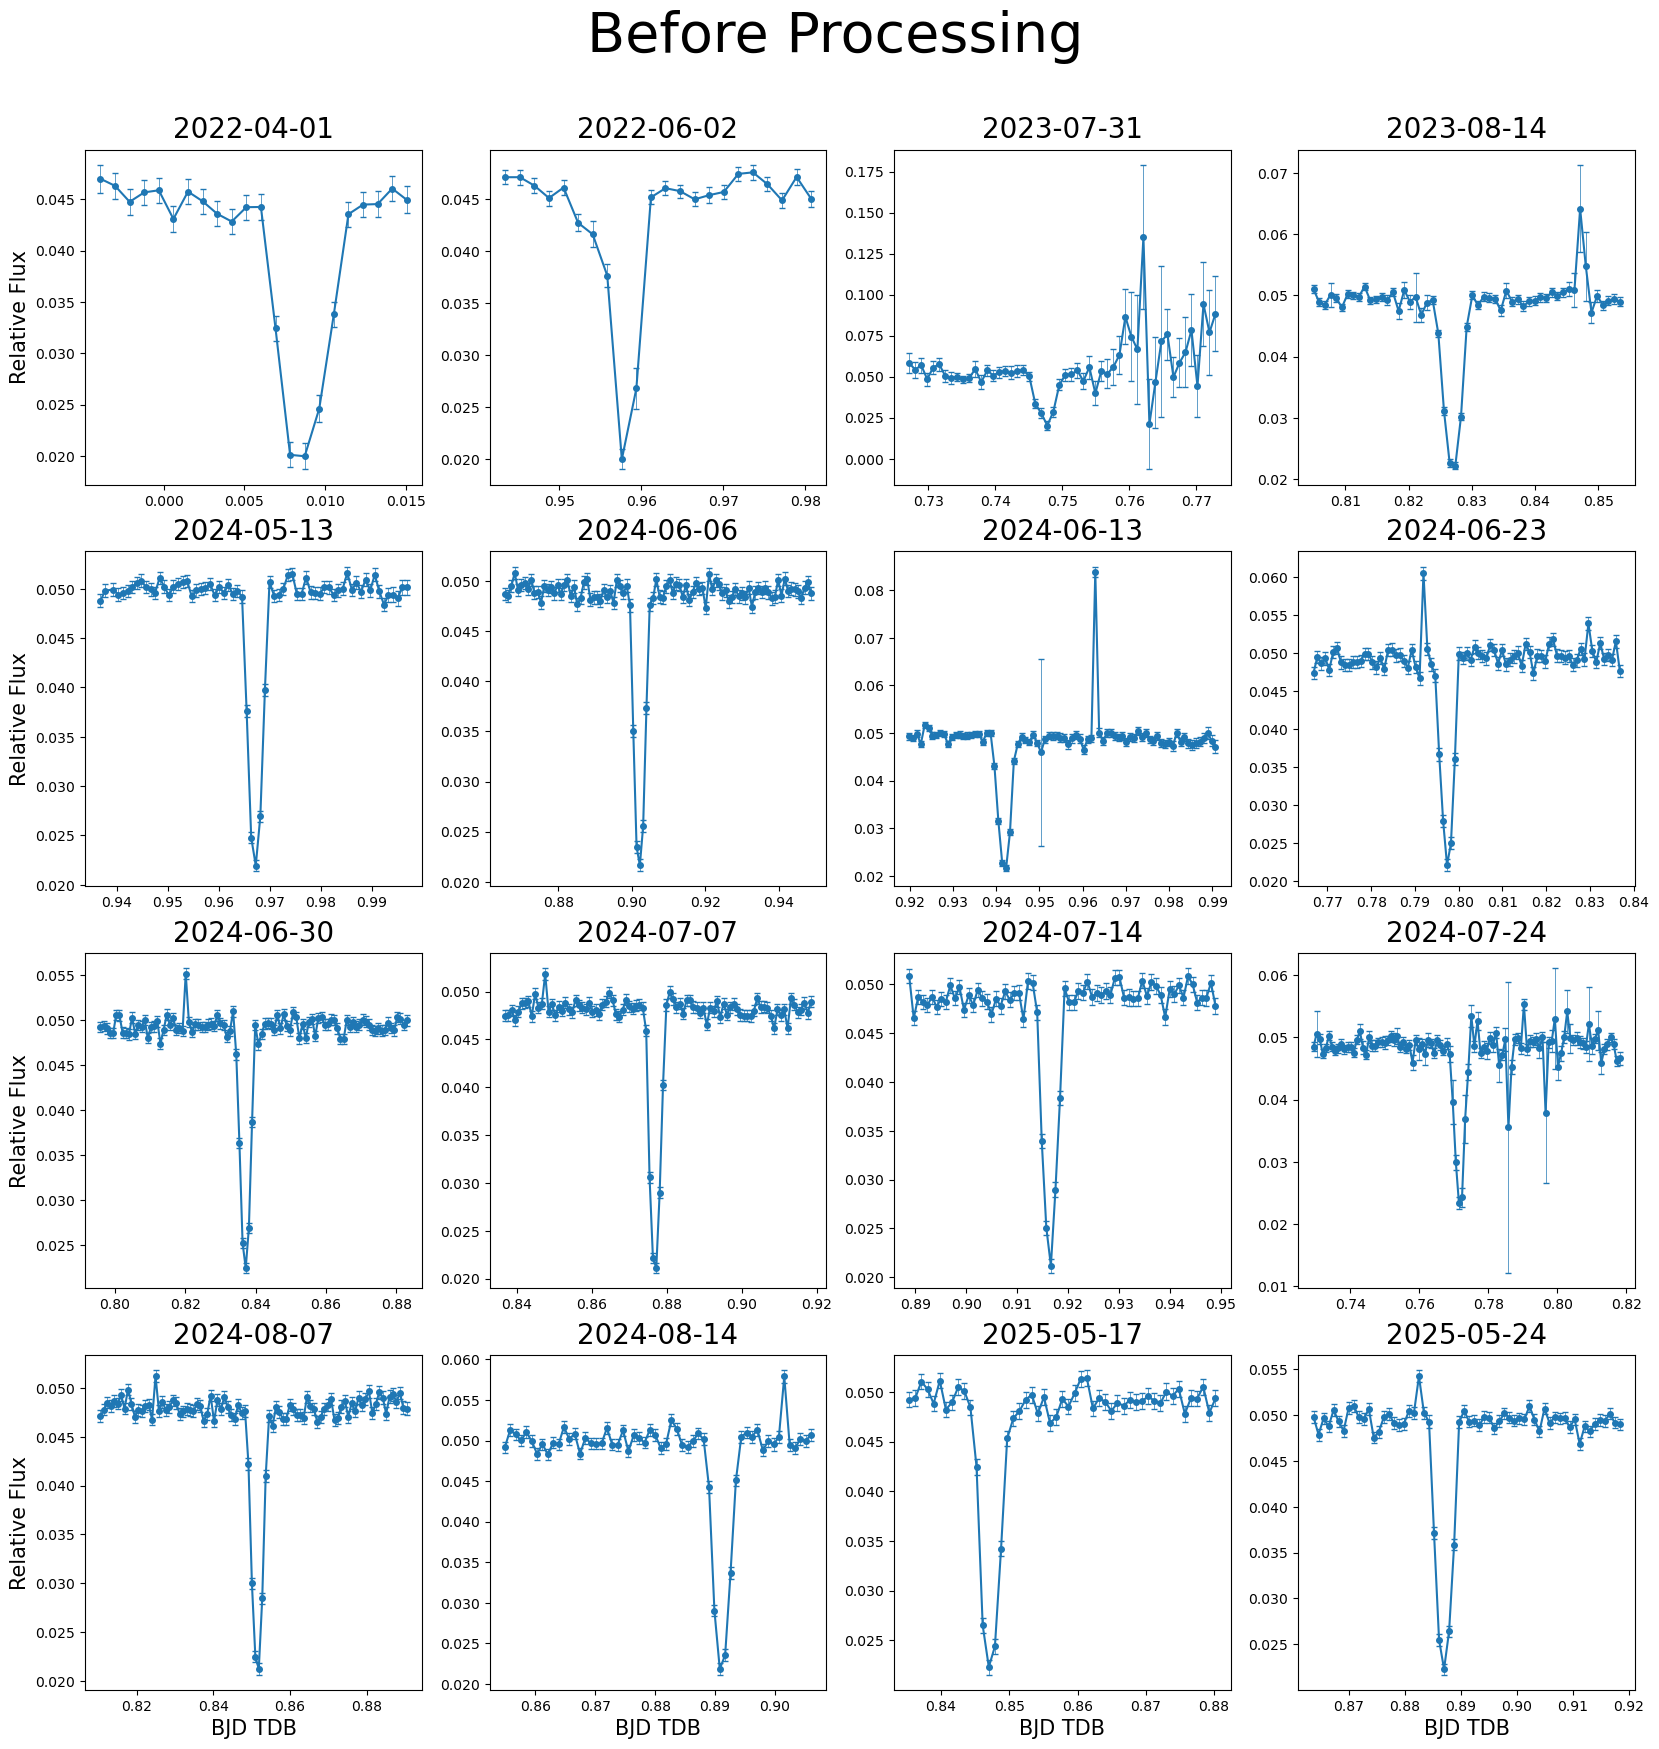

In [4]:
# plot unprocessed lightcurves
plot_lightcurves(data_arr, 'Before Processing')

In [5]:
# remove noisy shoulders and obvious outliers
data_arr[2] = data_arr[2].iloc[:30]
data_arr[3] = data_arr[3].iloc[:46]
data_arr[6] = data_arr[6].drop([34, 48])
data_arr[7] = data_arr[7].drop([28])
data_arr[8] = data_arr[8].drop([27])
data_arr[9] = data_arr[9].drop([12])
data_arr[11] = data_arr[11].drop([63, 75])
data_arr[13] = data_arr[13].drop([52])
data_arr[15] = data_arr[15].drop([21])

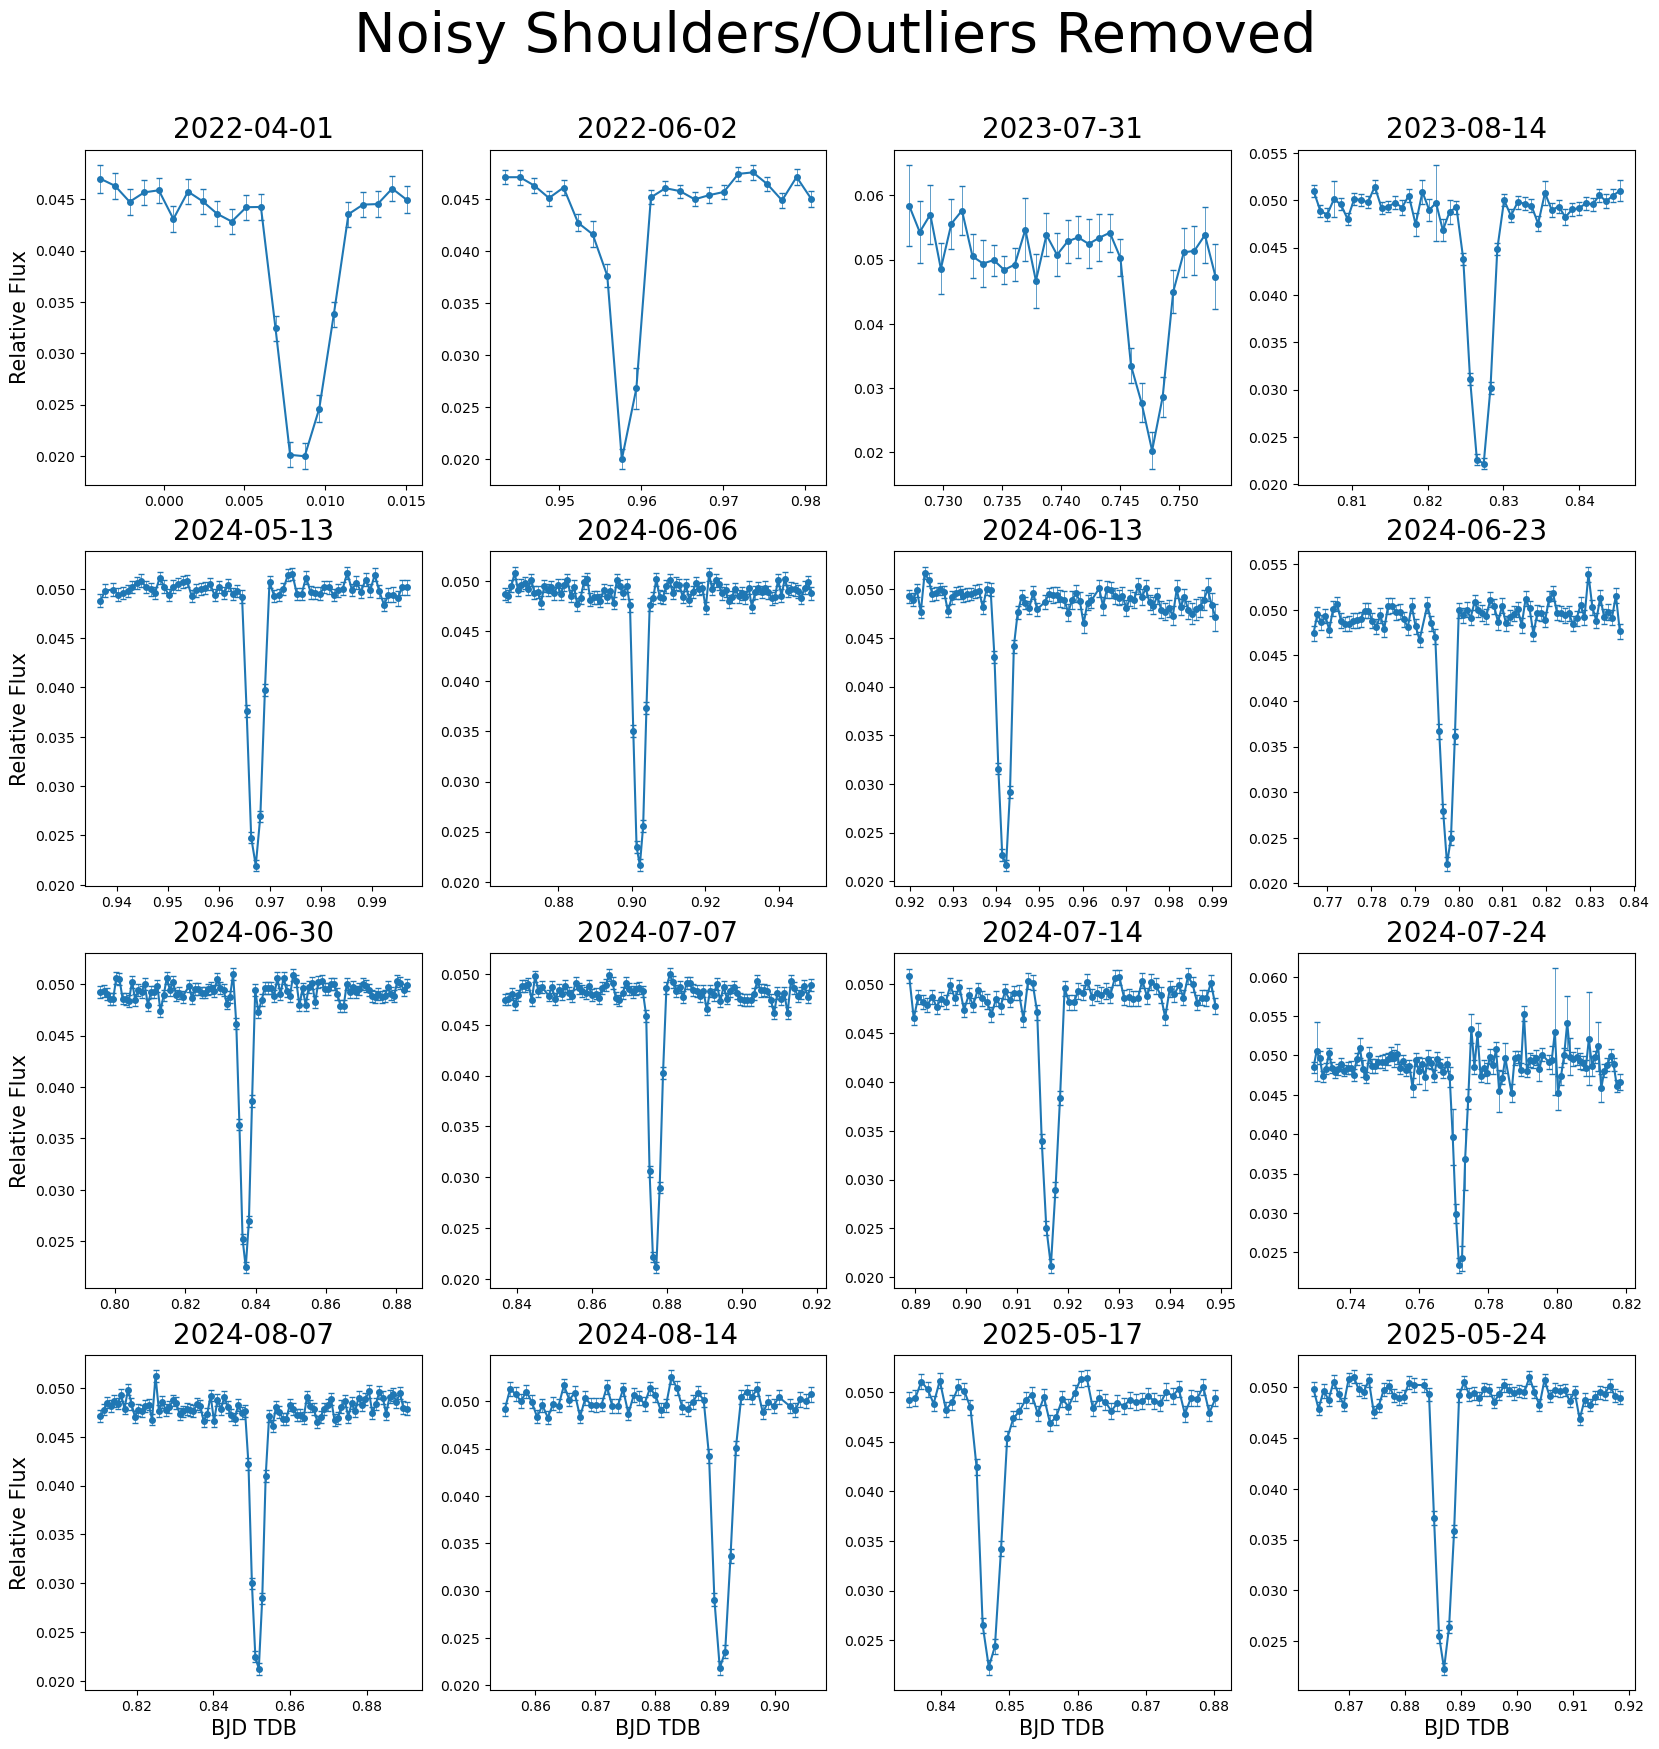

In [19]:
plot_lightcurves(data_arr, 'Noisy Shoulders/Outliers Removed')

In [ ]:
# identify transit start/middle/end
start = np.array([11,  5, 20, 21, 30, 38, 21, 30, 42, 41, 28, 44, 42, 37, 10, 23])
mid =   np.array([14,  8, 23, 25, 33, 41, 25, 34, 46, 45, 31, 47, 46, 40, 13, 26])
end =   np.array([17, 10, 26, 28, 36, 44, 28, 37, 49, 48, 34, 51, 49, 44, 17, 29])

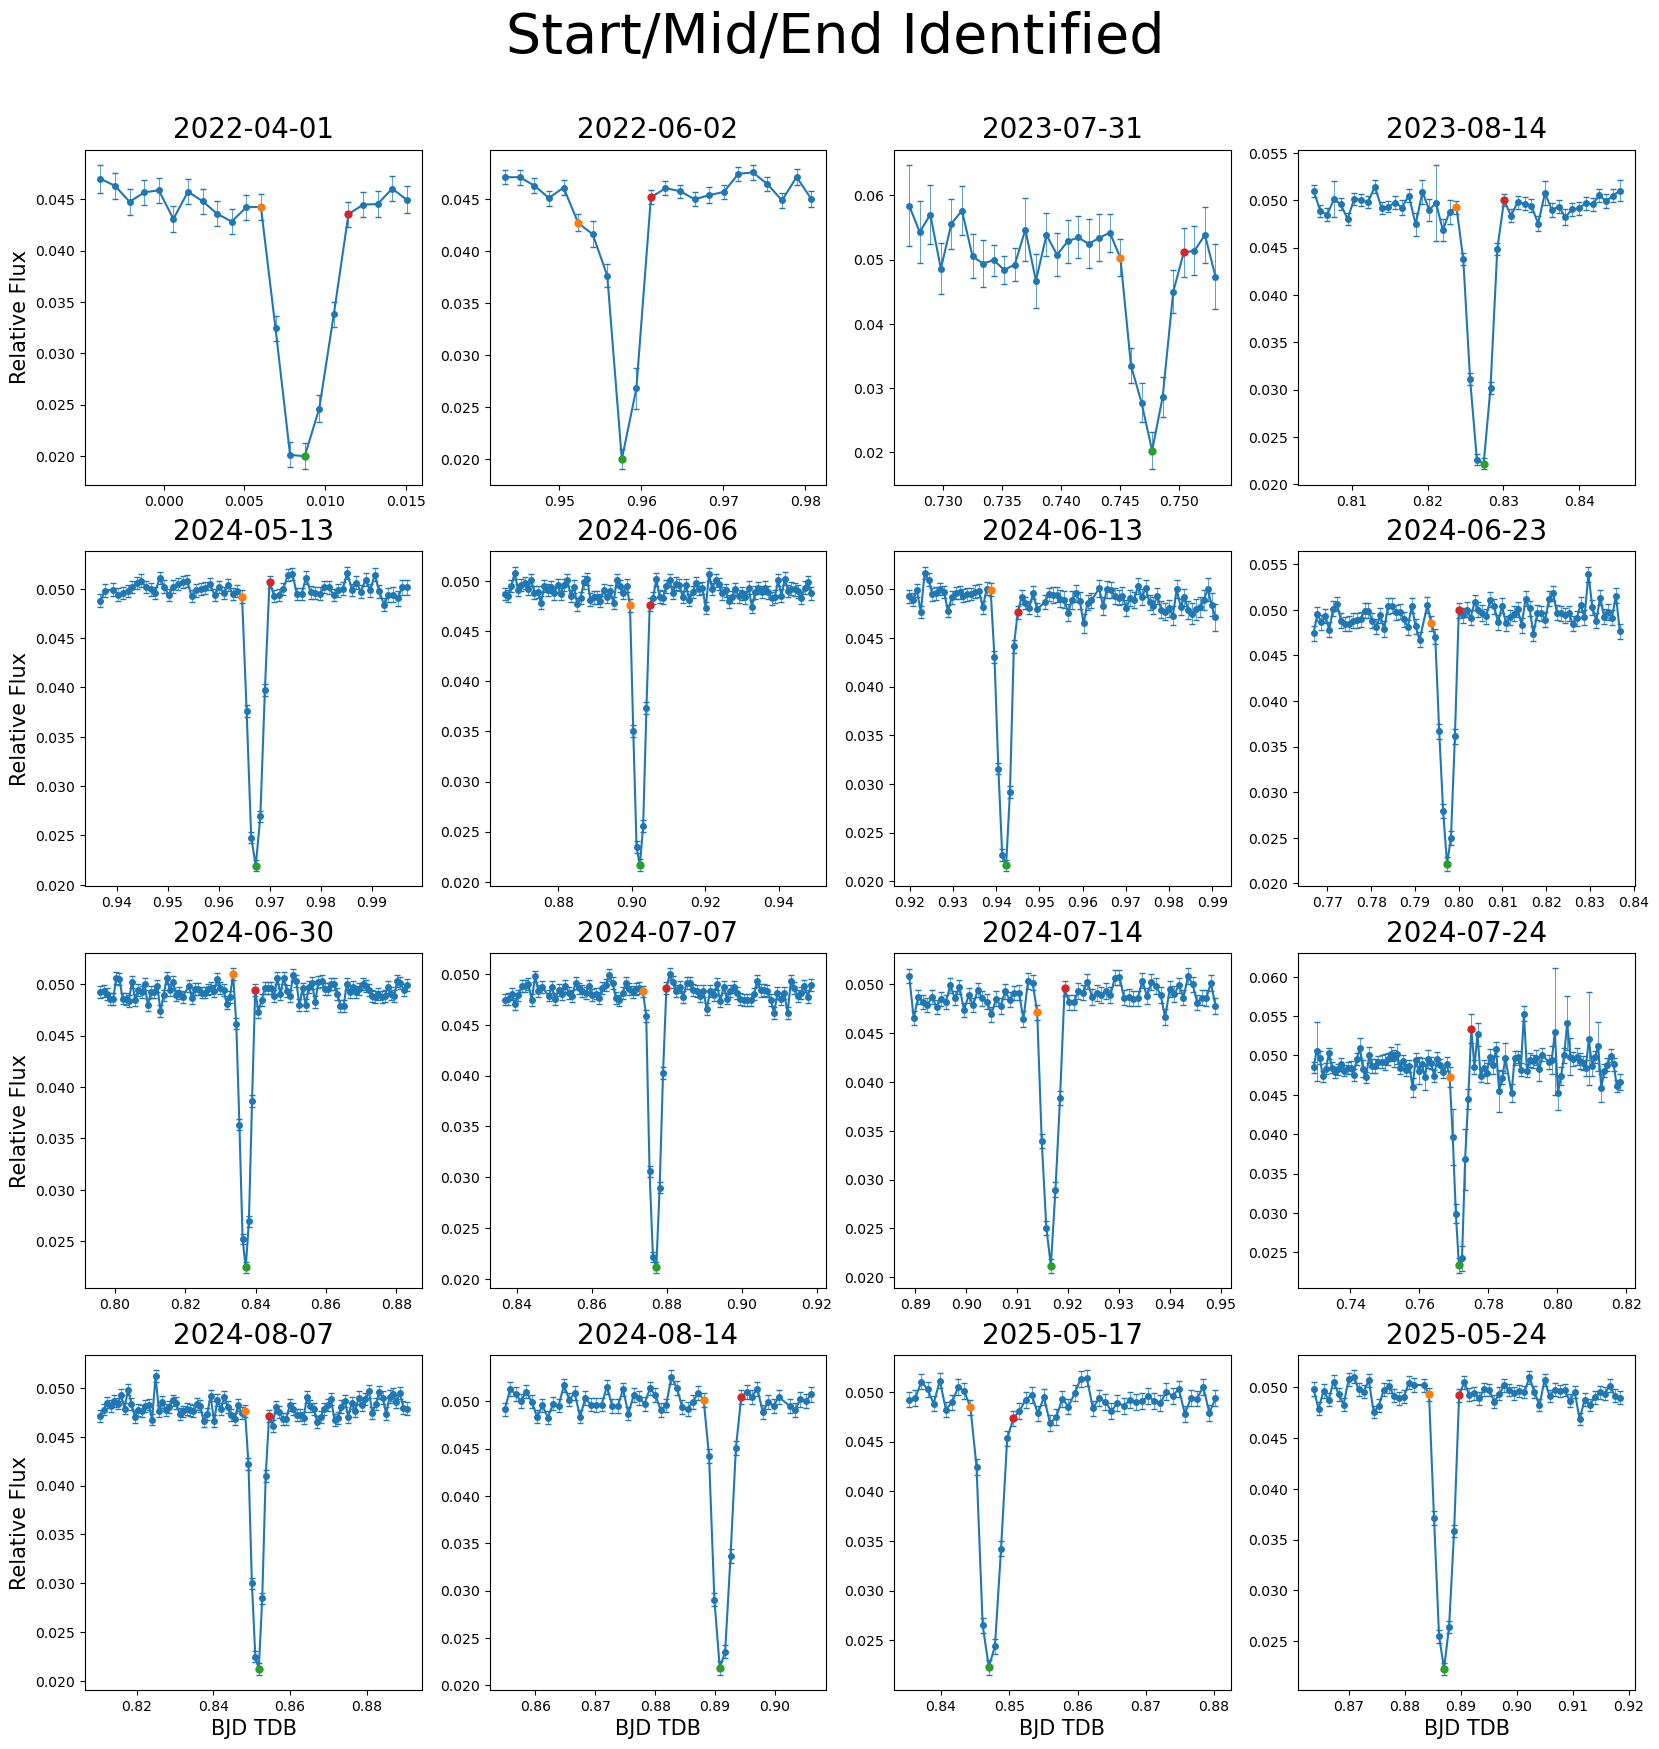

In [60]:
plot_lightcurves(data_arr, 'Start/Mid/End Identified', start=start, mid=mid, end=end)

In [78]:
for i in range(len(data_arr)):
    median = np.median(np.concatenate((data_arr[i]['rel_flux_T1'][:start[i]], data_arr[i]['rel_flux_T1'][end[i]:])))
    data_arr[i].insert(len(data_arr[i]), 'rel_flux_T1_normalized', data_arr[i]['rel_flux_T1'] / median)
    data_arr[i].insert(len(data_arr[i]), 'rel_flux_err_T1_normalized', data_arr[i]['rel_flux_err_T1'] / median)

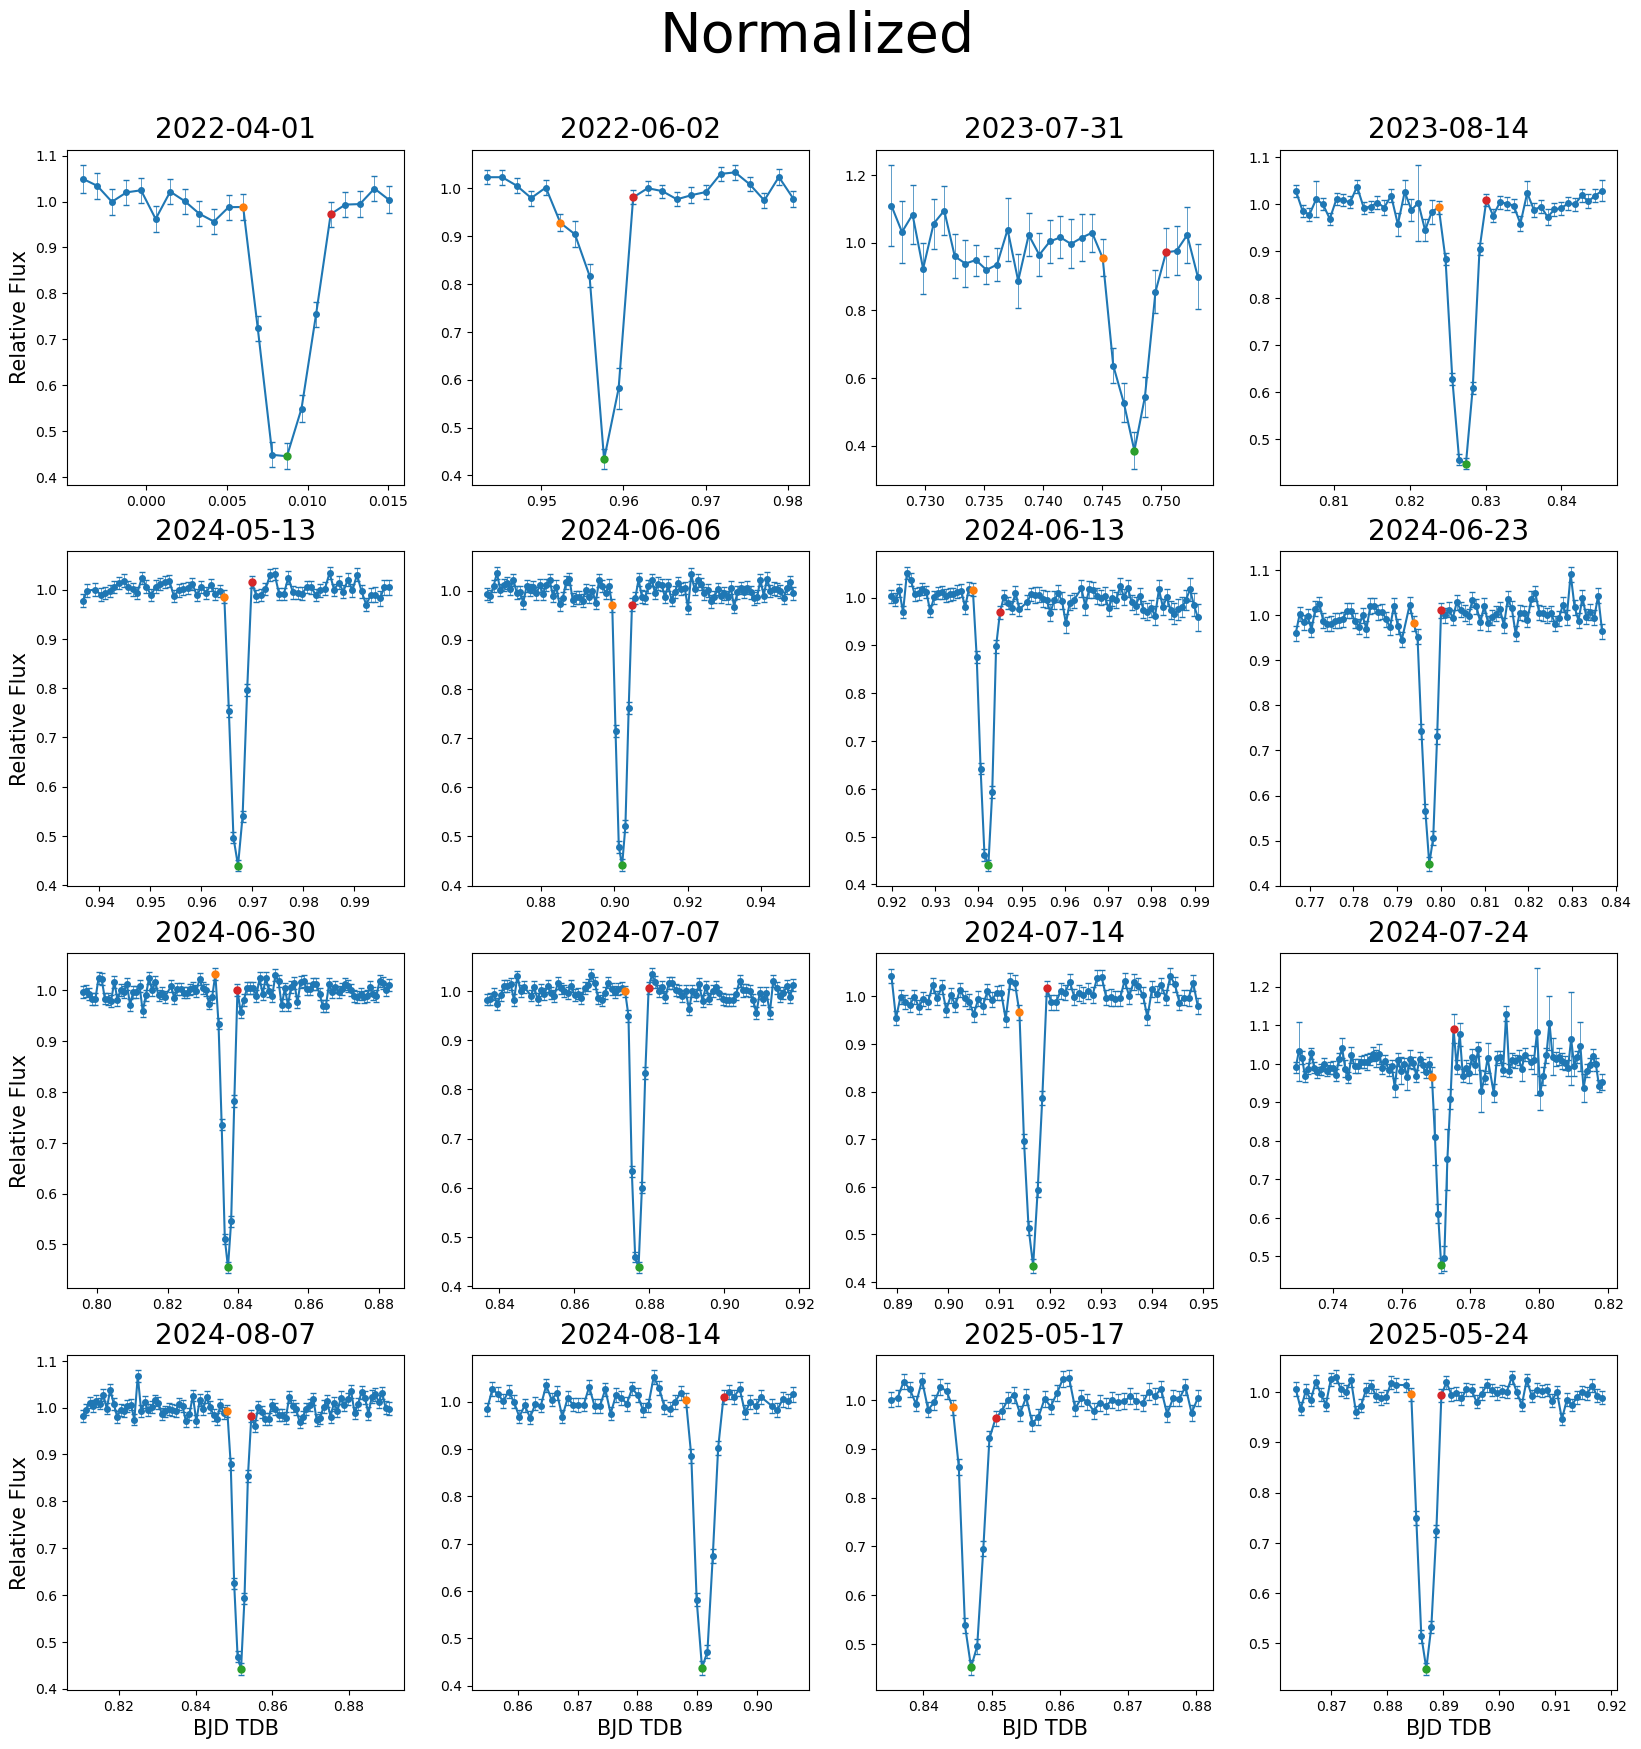

In [80]:
plot_lightcurves(data_arr, 'Normalized', start=start, mid=mid, end=end, normalized=True)

In [83]:
np.save('/Users/eligendreaudistler/Desktop/wd-1856-534b/arrays/data_arr.npy', np.array(data_arr, dtype=object))